In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import csv
import cv2
import os
from numpy import genfromtxt
import requests
import re
import tensorflow as tf
from tensorflow import keras 
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
def CSV_To_Dataframe(letter, start, end, step):
    path = "./ASL_64/train/"
    data = []
    for num in range(start, end, step):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',sep=',',header= None)
        array = df.to_numpy()
        result = array.flatten()
        
        arr = []
        for x in result:
            replaced = re.sub("[^0-9 ]+", "", x)
            replaced = re.sub(' +', ' ', replaced).strip()
            replaced = replaced.split(" ")
            replaced = [(eval(i)/255) for i in replaced]
            arr.append(replaced)
        
        data.append(arr)
    np_data = np.array(data)
    return np_data

In [2]:
letter_to_num = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
    'd' : 4,
    'e' : 5,
    'f' : 6,
    'g' : 7,
    'h' : 8,
    'i' : 9,
    'j' : 10,
    'k' : 11,
    'l' : 12,
    'm' : 13,
    'n' : 14,
    'o' : 15,
    'p' : 16,
    'q' : 17,
    'r' : 18,
    's' : 19,
    't' : 20,
    'u' : 21,
    'v' : 22,
    'w' : 23,
    'x' : 24,
    'y' : 25,
    'z' : 26,
}

In [10]:
def create_data(letters, start, end):
    data = np.concatenate([CSV_To_Dataframe(x, start, end) for x in letters])
    labels = []
    for letter in letters:
        labels = labels + ([[letter_to_num[letter]]]*(end-start))
    labels = np.array(labels)
    return data, labels

master_df, master_labels = create_data("abcdefghijklmnopqrstuvwxyz", 1, 3001) 
#test_df, test_labels = create_data("abcdefghijklmnopqrstuvwxyz", 501, 751)

MemoryError: Unable to allocate 916. MiB for an array with shape (3000, 200, 200) and data type float64

In [38]:
print(master_df.shape)
print(test_df.shape)
""" master_labels = []
test_labels = []
for i in range(1,27):
    for j in range(100):
        test_labels.append(i) """
test_labels = np.array(test_labels)
 
print(test_labels.shape)
""" for i in range(1,27):
    for j in range(200):
        master_labels.append(i)
master_labels = np.array(master_labels) """

print(master_labels.shape)
print(test_labels)


(52000, 64, 64)
(26000, 64, 64)
(26000,)
(52000,)
[ 1  1  1 ... 26 26 26]


In [35]:
master1 = np.load("master_numpy_1_300.npy", allow_pickle = True)
test1 = np.load("test_numpy_1_300.npy", allow_pickle = True)
master_labels1 = np.load("master_labels_numpy_1_300.npy", allow_pickle = True)
test_labels1 = np.load("test_labels_numpy_1_300.npy", allow_pickle = True)

master2 = np.load("master_numpy_301_601.npy", allow_pickle = True)
test2 = np.load("test_numpy_301_601.npy", allow_pickle = True)
master_labels2 = np.load("master_labels_numpy_301_601.npy", allow_pickle = True)
test_labels2 = np.load("test_labels_numpy_301_601.npy", allow_pickle = True)

master = np.concatenate([master1, master2])
test = np.concatenate([test1, test2])
master_label = np.concatenate([master_labels1, master_labels2])
test_label = np.concatenate([test_labels1, test_labels2])

In [7]:
np.save("master_numpy_1_601", master)
np.save("test_numpy_1_601", test)
np.save("master_labels_numpy_1_601", master_label)
np.save("test_labels_numpy_1_601", test_label)

In [8]:
print(test_label.shape)

(5200,)


In [4]:
print(master.shape)
print(master_labels.shape)
print(test.shape)
print(test_labels.shape)

(52000, 64, 64)
(52000,)
(26000, 64, 64)
(26000,)


In [6]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, input_shape=(64,64)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation = 'relu'))
# model.add(keras.layers.Dense(32, activation = 'sigmoid'))
model.add(keras.layers.Dense(124))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(27, activation = 'softmax'))


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

model.summary()

history = model.fit(
    master, master_labels, validation_data=(test, test_labels), batch_size=36, epochs=15
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 124)               12524     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8000      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1755      
Total params: 88,679
Trainable params: 88,479
Non-trainable params: 200
__________________________________________________

813/813 - 9s - loss: 11.8410 - accuracy: 0.0288 - 9s/epoch - 11ms/step


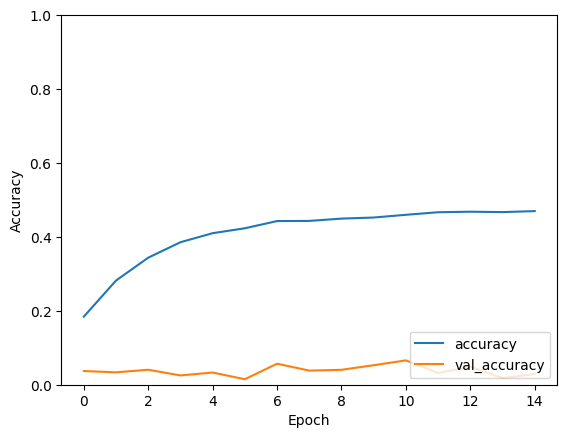

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_labels, verbose=2)

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(27))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(master, master_labels, epochs=7, 
                    validation_data=(test, test_labels))

Epoch 1/7
1625/1625 [==============================] - 133s 81ms/step - loss: 2.1203 - accuracy: 0.2531 - val_loss: 8.3012 - val_accuracy: 0.0493
Epoch 2/7
1625/1625 [==============================] - 131s 80ms/step - loss: 1.1787 - accuracy: 0.4164 - val_loss: 11.6462 - val_accuracy: 0.0433
Epoch 3/7
1625/1625 [==============================] - 128s 79ms/step - loss: 0.9487 - accuracy: 0.4532 - val_loss: 12.3574 - val_accuracy: 0.0142
Epoch 4/7
1625/1625 [==============================] - 120s 74ms/step - loss: 0.8635 - accuracy: 0.4655 - val_loss: 13.8298 - val_accuracy: 0.0368
Epoch 5/7
1625/1625 [==============================] - 129s 79ms/step - loss: 0.8225 - accuracy: 0.4734 - val_loss: 13.4201 - val_accuracy: 0.0494
Epoch 6/7
1625/1625 [==============================] - 129s 79ms/step - loss: 0.7992 - accuracy: 0.4773 - val_loss: 14.3731 - val_accuracy: 0.0673
Epoch 7/7
1625/1625 [==============================] - 130s 80ms/step - loss: 0.7896 - accuracy: 0.4823 - val_loss: 14.

In [7]:
model.save('model_64_all.h5')

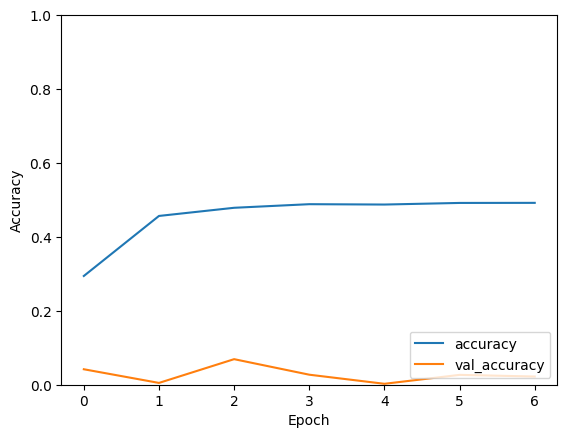

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [6]:
## Convert Image Size and save them

def convert_image_size_64(letter, start, end, step):
    path = "./ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/"
    new_path = "./ASL_CSV_64/train/"

    for num in range(start, end, step):
        image = Image.open(path+letter+'/'+letter+str(num)+'.jpg')
        new_image = image.resize((64,64))
        new_image.save(new_path+letter+'/'+letter+str(num)+'.jpg')
        
    return 0


for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    convert_image_size_64(letter, 1, 3001, 1)